In [22]:
import os.path as osp
import json
import sys
import numpy as np
import skimage.io as io
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon, Rectangle
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
sys.path.insert(0, '../pyutils/refer')
from refer import REFER
data_root = '../data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=9.51s)


In [17]:
# load prepro+
data = json.load(open('../cache/prepro+/refcoco_unc/data.json'))
Refs_p = {ref['ref_id']: ref for ref in data['refs']}
Sentences_p = {sent['sent_id']: sent for sent in data['sentences']}

In [13]:
# check the new parts
old_ref_ids = [ref_id for ref_id, ref in refer.Refs.items()]
new_ref_ids = [ref['ref_id'] for ref in data['refs']]
new_ref_ids = list(set(new_ref_ids) - set(old_ref_ids))

In [54]:
# check these ref_ids
ref_id = new_ref_ids[1070]
ref = Refs_p[ref_id]
ann_id = ref['ann_id']
image_id = ref['image_id']
sent_ids = ref['sent_ids']
sents = [Sentences_p[sent_id]['sent'] for sent_id in sent_ids]

[u'girl in red shirt', u'woman in red shirt', u'person in red shirt']


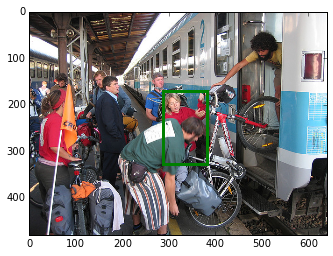

In [55]:
# show this new_ref according to ann_id
ax = plt.gca()
image = refer.Imgs[image_id]
I = io.imread(osp.join('../data/images/mscoco/images/train2014', image['file_name']))
ax.imshow(I)
bbox = refer.Anns[ann_id]['bbox']
box_plot = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='green', linewidth=3)
ax.add_patch(box_plot)
print(sents)